# <span style="color:green"> Laboratorio di Simulazione Numerica </span>
## <span style="color:blue">  Esercitazione 8</span>

In Meccanica Quantistica, secondo il principio variazionale, il valore di aspettazione di un Hamiltoniana calcolato in un buon stato di prova ha come limite inferiore l'energia dello stato fondamentale $E_0$:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

Per calcolare questo integrale facciamo una media pesata sulla probabilità ( $ = |\Psi_T(x)|^2 $) di trovarsi in un dato punto dello spazio. Per campionare la probabilità utilizziamo il Metropolis. La media pesata viene eseguita con il metodo a blocchi con $N= 50$ blocchi da $L=10000$ step ciascuno. 

Nello specifichio prendiamo in esame un sistema di una particella monodimensionale confinata nel potenziale:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

Risolveremo il problema tramite il Metodo Variazionale Montecarlo usando come funzione d'onda di prova per il ground state:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

dove $\sigma$ and $\mu$ sono i due parametri variazionali: si calcola 
$ \langle {\hat H} \rangle_T $ al variare di questi fino a trovarne il minimo.
Più nel dettaglio per variare i parametri in modo da far convergere il sistema verso il minimo dell'energia utilizziamo il metodo del Simulated Annealing, ovvero si riproduce algoritmicamenete ciò che avviene in natura: raffreddando un sistema questo tende a portarsi nel suo stato fondamentale, ciò avviene perché la probabilità di trovarsi in uno stato a energia E è proporzionale al peso di Boltzmann $ e^{-\beta E} $ quindi al diminuire della temperatura diventa meno probabile trovare il sistema in uno stato ad alta energia. 
Si tratta quindi di iterare il Metropolis usando come probabilità di transizione il peso di Boltzmann e a ogni iterazione scalare la temperatura di un fattore $\alpha = 0,95$, partendo da $T=0.1 K$ fino ad arrivare a $T=10^{-5}K $

Il grafico riportato di seguito mostra l'evoluzione dell'energia del sistema al diminuire della temperatura.

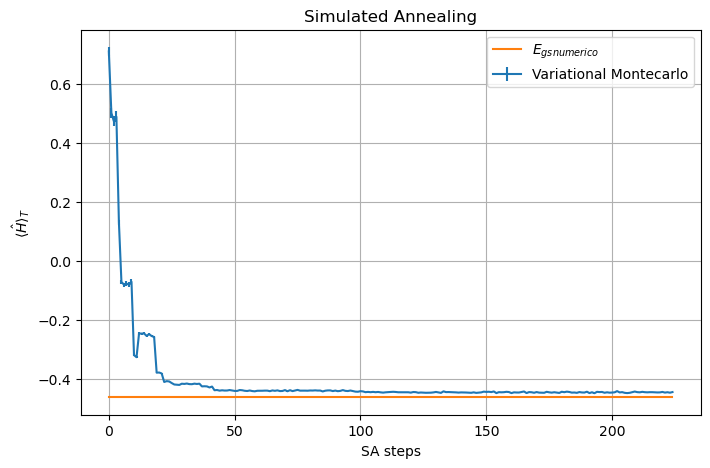

In [405]:

# Genera i valori di x e y
dataw = np.loadtxt("EnediT.dat")
l= len(dataw)
x=np.arange(l)
plt.figure(figsize=(8, 5))
plt.errorbar(x,dataw[:,1],yerr=dataw[:,2],label='Variational Montecarlo' )
#plt.xlim(max(data[:, 0]), min(data[:, 0]))
y= np.full(l,-0.46046587969271513)
plt.plot(x, y, label= '$E_{gs numerico}$')

# Aggiungi etichette agli assi

plt.xlabel('SA steps')
plt.ylabel('$\\langle \\hat H \\rangle_T$')
plt.legend()
plt.title('Simulated Annealing')
plt.grid(True)
# Mostra il grafico
plt.show()

Si è poi trovato il minimo dell'energia fra gli $ \langle {\hat H} \rangle_T $ sopra calcolati e con i parametri variazionali a esso associati siamo andati a definire la funzione dello stato fondamendamentale come  
$$
\Psi_0^{0.623,0.793}(x) \propto e^{-\frac{(x-0.793)^2}{2*0.623^2}}+
                               e^{-\frac{(x+0.793)^2}{2*0.623^2}}
$$
Il grafico sottostante mostra il suo campionamento 

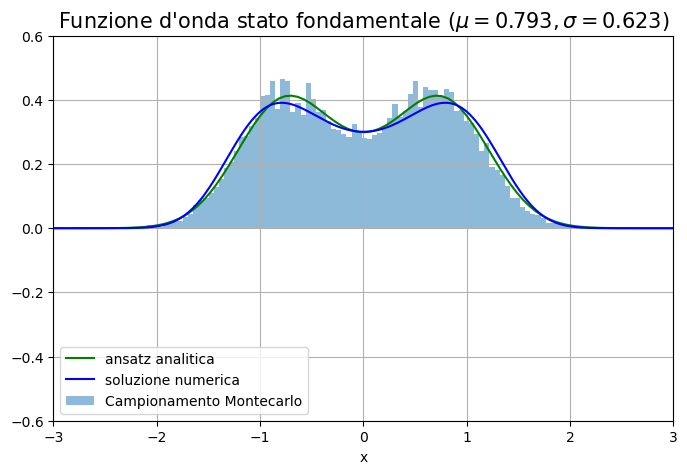

In [417]:

# Carica i dati dal file
data = np.loadtxt('sample.dat')

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)


# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3

import math
from scipy.optimize import curve_fit

def psiModel(x,sigma,mu):
    N = np.sqrt(2*sigma*np.sqrt(math.pi)*(1+np.exp(-(mu/sigma)**2)))
    return (np.exp(-(((x-mu)/sigma)**2)/2) + np.exp(-(((x+mu)/sigma)**2)/2))/N

mu = 0.793
sigma = 0.623
rng = np.linspace(-3.,3.,100)
model = psiModel(rng,sigma, mu)*psiModel(rng,sigma, mu)

plt.plot(rng, model, 'g', label= 'ansatz analitico')
plt.plot(x,(psi[0])**2, 'b', label= 'soluzione numerica')
plt.bar(bins[:-1], hist, alpha=0.5 , width=(bins[1]-bins[0]), label= 'Campionamento Montecarlo')

plt.title("Funzione d'onda stato fondamentale ($ \mu= 0.793, \sigma =0.623 $)", size= 15)
plt.xlabel("x")
plt.grid(True)
plt.legend()
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()

Mostriamo ora la stima dell'energia dello stato fondamentale associato ai parametri trovati

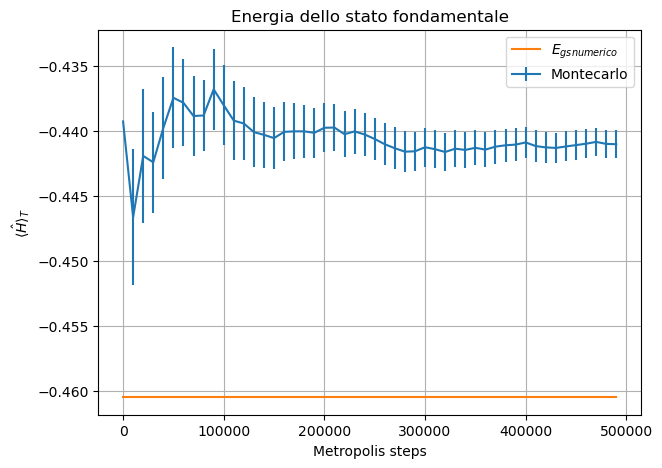

In [403]:
plt.figure(figsize=(7,5))

data2=np.loadtxt("Hbest.dat")

x=np.arange(len(data2))
x*=10000

plt.errorbar(x,data2[:,0],yerr=data2[:,1], label="Montecarlo")
plt.xlabel('Metropolis steps')
plt.ylabel('$\\langle \\hat H \\rangle_T$')
plt.grid(True)
y= np.full(len(data2),-0.46046587969271513)

plt.title('Energia dello stato fondamentale')
plt.plot(x, y, label= '$E_{gsnumerico}$')
plt.legend()
plt.show()

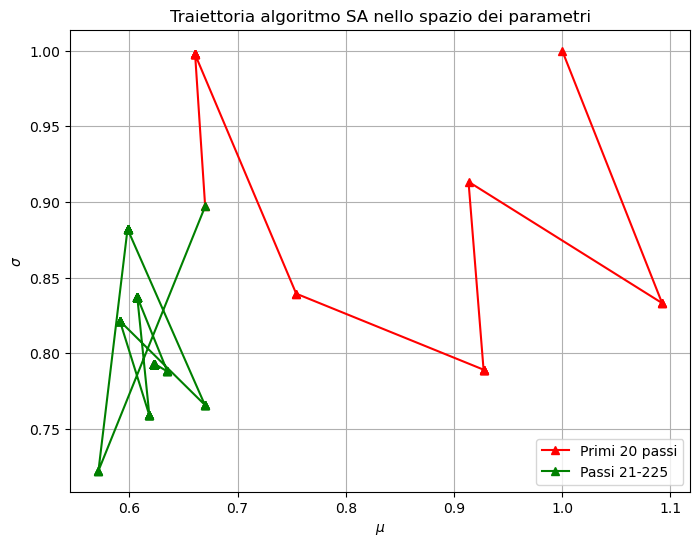

In [402]:
plt.figure(figsize=(8,6))
plt.plot(dataw[0:20:,3],dataw[0:20:,4], marker='^', markersize=6, color='r', label= 'Primi 20 passi')
plt.plot(dataw[21:225:,3],dataw[21:225:,4], marker='^', markersize=6, color='g', label='Passi 21-225')

# Crea un grafico 3D

# Aggiungi etichette agli assi
plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
plt.legend()
plt.title('Traiettoria algoritmo SA nello spazio dei parametri')
plt.grid(True)
# Mostra il grafico
plt.show()

Osserviamo che dopo pochi passi l'algoritmo concetra la sua ricerca attorno ai valori ottimali, sebbene siano stati eseguiti 225 passi SA i valori dei parametri esplorati sono in numero nettamente inferiore perché man mano che l'algoritmo converge diventa meno probabile accettare una modifica dei parametri